# DATA UNDERSTANDING

### Import Library




mengimpor library yang digunakan

- **pandas (pd)** → baca & kelola data tabel (DataFrame)  
- **numpy (np)** → operasi angka/array  
- **seaborn (sns)** → bikin grafik statistik rapi & informatif  
- **matplotlib (mpl)** → dasar visualisasi  
- **matplotlib.patches** → bikin bentuk/geometri (kotak, lingkaran, dll) di grafik  
- **matplotlib.pyplot (plt)** → bikin grafik sederhana (line, bar, scatter)  
- **IPython.display.display_html** → tampilkan tabel/grafik dengan format HTML di notebook  
- **plotly.graph_objects (go)** → visualisasi interaktif, kontrol detail elemen grafik  
- **plotly.express (px)** → cara cepat bikin grafik interaktif  
- **plotly.subplots.make_subplots** → gabungkan beberapa grafik interaktif dalam satu figure  
- **sklearn.feature_extraction.text.TfidfVectorizer** → ubah teks menjadi representasi numerik TF-IDF  
- **sklearn.metrics.pairwise.cosine_similarity** → hitung kesamaan antar vektor (misal untuk rekomendasi)  
- **sklearn.model_selection.train_test_split** → bagi data menjadi training & testing set  
- **sklearn.neighbors.NearestNeighbors** → algoritma untuk mencari tetangga terdekat (misal rekomendasi berbasis jarak)  


In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from IPython.display import display_html
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

mengcustom warna grafik yang akan digunakan
- **my_colors** → mendeklarasikan list warna dalam format HEX  
- **sns.color_palette(my_colors)** → ubah list warna jadi palet Seaborn  
- **sns.palplot(...)** → preview palet warna

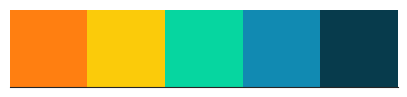

In [8]:
my_colors = ["#FF7F11", "#FBCB0A", "#06D6A0", "#118AB2", "#073B4C"]
sns.palplot(sns.color_palette(my_colors))

- **sns.set_style("white")** → atur gaya grafik Seaborn jadi background putih  
- **mpl.rcParams['xtick.labelsize'] = 16** → atur ukuran font label sumbu X (16)  
- **mpl.rcParams['ytick.labelsize'] = 16** → atur ukuran font label sumbu Y (16)  
- **mpl.rcParams['axes.spines.left'] = False** → sembunyikan garis tepi kiri grafik  
- **mpl.rcParams['axes.spines.right'] = False** → sembunyikan garis tepi kanan grafik  
- **mpl.rcParams['axes.spines.top'] = False** → sembunyikan garis tepi atas grafik  
- **class color:** → bikin class untuk styling teks di output (misalnya cetak teks dengan warna/tebal)  
  - **BOLD** → teks tebal dengan warna kuning  
  - **END** → reset format ke normal  

In [9]:
sns.set_style("white")
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
class color:
    BOLD = '\033[1m' + '\033[93m'
    END = '\033[0m'

### Import Dataset


Menginstal library **kaggle** langsung di Google Colab.  
  Digunakan supaya Colab bisa terhubung dengan akun Kaggle, mendownload dataset, dan mengelola file dari Kaggle API.  

In [10]:
!pip install kaggle

mengupload kaggle API

catatan tambahan jika kamu mau generate kaggle API
1. buat akun kaggle
2. pergi ke setting
3. scroll sampe ke bagian API
4. klik button create new token
5. kaggle otomatis kedownload

In [11]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cendekialuthfietanz","key":"576217f4c8ccdf3169c3d5581c9355c5"}'}

- **!mkdir -p ~/.kaggle** → buat folder `.kaggle` di direktori home.
- **!mv kaggle.json ~/.kaggle/** → pindahkan file `kaggle.json` (API key) ke folder `.kaggle`.  
- **!chmod 600 ~/.kaggle/kaggle.json** → ubah permission file supaya hanya bisa diakses oleh user biar lebih aman.

In [12]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Tentang Dataset IMDB Top 250 Movies (2021)**

Dataset ini saya ambil pada link kaggle berikut : https://www.kaggle.com/datasets/rajugc/imdb-top-250-movies-dataset

**Pendahuluan**
IMDB (Internet Movie Database) adalah salah satu basis data daring terbesar untuk film dan acara televisi.  
Menyediakan informasi lengkap tentang film, termasuk **rating** dan **ulasan** dari jutaan pengguna.  
Rating IMDB banyak digunakan sebagai **tolok ukur popularitas dan kesuksesan film**.  

Dataset ini berisi **250 film dengan rating tertinggi di IMDB (2021)**.  
Dengan menganalisis dataset ini, kita bisa melihat tren industri film seperti:
- Genre populer  
- Pola rating film  
- Faktor kesuksesan film  

Dataset diambil (scraping) dari situs IMDB untuk tujuan edukasi dan tersedia secara publik.

---

**Sumber Asli**
- Data diambil dari **IMDB (www.imdb.com)**  
- 250 film teratas dipilih berdasarkan **rating IMDB**  
- Informasi yang dikumpulkan: judul, sutradara, pemeran, rating, jumlah suara, tahun rilis, dll.  
- **Tidak ada data yang diubah atau dimodifikasi**  
- Data dikumpulkan sesuai dengan **Terms of Use IMDB**  

---

- **!kaggle datasets download** → download dataset dan sertakan direktorinya
biar ga salah kamu bisa gunakan fitur copy path.

In [23]:
!kaggle datasets download -d rajugc/imdb-top-250-movies-dataset

Dataset URL: https://www.kaggle.com/datasets/rajugc/imdb-top-250-movies-dataset
License(s): CC-BY-NC-SA-4.0
imdb-top-250-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


- **!unzip** → unzip file kaggle yang sudah di download sehingga menjadi folder

In [24]:
!unzip -o imdb-top-250-movies-dataset.zip -d imdb_data

Archive:  imdb-top-250-movies-dataset.zip
  inflating: imdb_data/IMDB Top 250 Movies.csv  


- **pd.read_csv('...')** → baca file CSV jadi DataFrame Pandas.  
- **data = ...** → simpan hasil pembacaan CSV ke variabel `data`.  
- **data.head()** → tampilkan 5 baris pertama dari DataFrame (preview data).  


**Deskripsi Kolom**
- **rank** → Peringkat film  
- **name** → Nama film  
- **year** → Tahun rilis  
- **rating** → Rating film  
- **genre** → Genre film  
- **certificate** → Sertifikat film (rating usia)  
- **run_time** → Durasi total film  
- **tagline** → Tagline film  
- **budget** → Anggaran produksi  
- **box_office** → Total pendapatan box office global  
- **casts** → Semua pemeran film  
- **directors** → Sutradara film  
- **writers** → Penulis naskah film  

In [18]:
data = pd.read_csv('/content/imdb_data/IMDB Top 250 Movies.csv')
data.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


# EXPLORATORY DATA ANALYSIS



### Univariate Exploratory Data Analysis - Deskripsi Variabel


Melihat Struktur Dataset
- `data.info()` → untuk ringkasan dataset:  
  - Jumlah baris dan kolom  
  - Nama kolom  
  - Tipe data setiap kolom  
  - Ada nilai yang kosong (missing values) atau nggak  

Biar tau struktur data sebelum mulai analisis.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


### Univariate Exploratory Data Analysis - Deskripsi Variabel


Statistik Deskriptif Dataset
Lihat ringkasan statistik dataset

- `data.describe()` → kasih gambaran cepat tentang data numerik:  
  - Mean (rata-rata)  
  - Standard deviation (simpangan baku)  
  - Min & max  
  - Quartiles (25%, 50%, 75%)  

Biar paham distribusi awal data, mendeteksi outlier, dan mengetahui rentang nilai dari setiap variabel numerik.

In [35]:
data.describe()

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


### Exploratory Data Analysis - Rata-rata Ratings berdasarkan Genre

- **df.groupby('genre', as_index=False)** → kelompokkan data berdasarkan kolom `genre`.  
- **.agg({'rating': 'mean'})** → hitung rata-rata (`mean`) kolom `rating` untuk tiap genre.  
- **.round(2)** → bulatkan hasil rata-rata jadi 2 desimal.  
- **.sort_values(by='rating', ascending=False)** → urutkan hasil dari rating tertinggi ke terendah.  
- **.head(10)** → ambil 10 genre dengan rating rata-rata tertinggi.  
- **.reset_index(drop=True)** → reset ulang index biar rapi.  
- **top_rates** → DataFrame baru berisi 10 genre dengan rata-rata rating tertinggi.  


In [36]:
# Hitung rata-rata rating per genre dan ambil 10 tertinggi
top_rates = (
    df.groupby('genre', as_index=False)
      .agg({'rating': 'mean'})
      .round(2)
      .sort_values(by='rating', ascending=False)
      .head(10)
      .reset_index(drop=True)
)

top_rates

,genre,rating
0,"Adventure,Western",8.8
1,"Action,Adventure,Drama",8.7
2,"Adventure,Drama,Sci-Fi",8.6
3,"Crime,Drama,Fantasy",8.6
4,"Drama,Family,Fantasy",8.6
5,"Animation,Adventure,Drama",8.5
6,"Adventure,Comedy,Sci-Fi",8.5
7,"Action,Drama,Mystery",8.5
8,"Horror,Mystery,Thriller",8.5
9,"Drama,Mystery,War",8.5


### Exploratory Data Analysis - 5 Film Teratas Berdasarkan Rating

- **data.nlargest(5, 'rating')** → ambil 5 film dengan rating tertinggi.  
- **px.bar(...)** → buat bar chart interaktif dengan Plotly Express.  
  - **y='name'** → nama film di sumbu Y.  
  - **x='rating'** → rating di sumbu X.  
  - **title='5 Film Teratas Berdasarkan Rating'** → judul grafik.  
  - **color_discrete_sequence=['#06D6A0']** → atur warna batang grafik.  
  - **text='rating'** → tampilkan nilai rating di atas tiap batang.  
  - **orientation='h'** → buat bar chart horizontal.  
- **fig.update_layout(yaxis=dict(autorange="reversed"))** → balik urutan sumbu Y supaya film dengan rating tertinggi berada di atas.  
- **fig.show()** → tampilkan grafik interaktif di notebook.  



In [76]:
top_movies = data.nlargest(5, 'rating')

fig = px.bar(
    top_movies,
    y='name',       # nama film di sumbu y
    x='rating',     # rating di sumbu x
    title='5 Film Teratas Berdasarkan Rating',
    color_discrete_sequence=['#06D6A0'],
    text='rating',  # menampilkan nilai rating di atas bar
    orientation='h' # membuat bar horizontal
)

fig.update_layout(
    yaxis=dict(autorange="reversed")  # supaya film dengan rating tertinggi di atas
)

fig.show()

### Exploratory Data Analysis - 5 Film Teratas Berdasarkan Genre

- **data.nlargest(5, 'rating')** → ambil 5 baris dengan nilai `rating` tertinggi.  
- **px.bar(...)** → buat bar chart interaktif dengan Plotly Express.  
  - **x='genre'** → sumbu X berdasarkan kolom `genre`.  
  - **y='rating'** → sumbu Y berdasarkan kolom `rating`.  
  - **title='5 Film Teratas Berdasarkan Genre'** → judul grafik.  
  - **color_discrete_sequence=['#06D6A0']** → atur warna batang grafik.  
- **fig.show()** → tampilkan grafik interaktif di notebook.  


In [77]:
top_rates = data.nlargest(5, 'rating')
fig = px.bar(
    top_rates,
    x='genre',
    y='rating',
    title='5 Film Teratas Berdasarkan Genre',
    color_discrete_sequence=['#06D6A0']
)
fig.show()


### Exploratory Data Analysis - 5 Film Teratas Berdasarkan Casts

- **data.nlargest(5, 'rating')** → ambil 5 film dengan rating tertinggi.  
- **go.Figure(data=[go.Bar(...)])** → buat bar chart interaktif dengan Plotly Graph Objects.  
  - **x=top_movies['casts']** → nama pemeran film di sumbu X.  
  - **y=top_movies_d['rating']** → rating film di sumbu Y.  
  - **marker={'color': '#06D6A0'}** → atur warna batang.  
- **fig.update_layout(title='5 Film Teratas Berdasarkan Casts')** → beri judul grafik.  
- **fig.show()** → tampilkan grafik interaktif di notebook.  


In [78]:
top_movies_d = data.nlargest(5, 'rating')
fig = go.Figure(data=[go.Bar(x=top_movies['casts'], y=top_movies_d['rating'], marker={'color': '#06D6A0'})])
fig.update_layout(title='5 Film Teratas Berdasarkan Casts')
fig.show()

### Exploratory Data Analysis - 5 Film Teratas Berdasarkan Directors

- **data.nlargest(5, 'rating')** → ambil 5 film dengan rating tertinggi.  
- **go.Figure(go.Bar(...))** → buat bar chart interaktif dengan Plotly Graph Objects.  
  - **x=top_movies_d['directors']** → nama sutradara di sumbu X.  
  - **y=top_movies_d['rating']** → rating film di sumbu Y.  
  - **marker_color='#06D6A0'** → atur warna batang.  
  - **text=top_movies_d['rating']** → tampilkan nilai rating di atas tiap batang.  
  - **textposition='auto'** → posisi teks otomatis di atas batang.  
- **fig.update_layout(...)** → atur judul grafik dan label sumbu X/Y.  
- **fig.show()** → tampilkan grafik interaktif di notebook.  


In [79]:
top_movies_d = data.nlargest(5, 'rating')

fig = go.Figure(go.Bar(
    x=top_movies_d['directors'],  # pakai top_movies_d
    y=top_movies_d['rating'],
    marker_color='#06D6A0',
    text=top_movies_d['rating'],   # menampilkan rating di atas bar
    textposition='auto'
))

fig.update_layout(
    title='5 Film Teratas Berdasarkan Directors',
    xaxis_title='Directors',
    yaxis_title='Rating'
)

fig.show()

### Exploratory Data Analysis - 5 Film Teratas Berdasarkan Penulis

- **data.nlargest(5, 'rating')** → ambil 5 film dengan rating tertinggi.  
- **go.Figure(data=[go.Bar(...)])** → buat bar chart interaktif dengan Plotly Graph Objects.  
  - **x=top_movies['writers']** → nama penulis film di sumbu X.  
  - **y=top_movies_w['rating']** → rating film di sumbu Y.  
  - **marker={'color': '#06D6A0'}** → atur warna batang.  
- **fig.update_layout(title='5 Film Teratas Berdasarkan Penulis')** → beri judul grafik.  
- **fig.show()** → tampilkan grafik interaktif di notebook.  

In [80]:
top_movies_w = data.nlargest(5, 'rating')
fig = go.Figure(data=[go.Bar(x=top_movies['writers'], y=top_movies_w['rating'], marker={'color': '#06D6A0'})])
fig.update_layout(title='5 Film Teratas Berdasarkan Penulis')
fig.show()

### Exploratory Data Analysis - Jumlah Certificate

- **data['box_office'].replace("Not Available", 0)** → ganti semua nilai "Not Available" di kolom `box_office` menjadi 0.  
- **data['box_office'] = ...** → simpan hasil penggantian kembali ke kolom `box_office`.  
Tujuan: supaya kolom bisa dipakai untuk analisis numerik tanpa error.  

In [81]:
data['box_office'] = data['box_office'].replace("Not Available", 0)

- **data['certificate'].value_counts()** → hitung jumlah kemunculan masing-masing kategori di kolom `certificate`.  
- **certificate_counts = ...** → simpan hasil perhitungan ke variabel `certificate_counts`.  
- **certificate_counts** → menampilkan jumlah film per kategori certificate.  

**Keterangan Certificate Film:**

- **R**           : Sangat tidak untuk anak-anak; banyak kekerasan, seks, dan bahasa kasar.
- **PG**          : Cukup baik untuk anak-anak; sedikit bahasa atau kekerasan ringan, aman untuk mata kecil.  
- **PG-13**       : Orangtua disarankan mendampingi remaja; aksi dan ketegangan lebih.  
- **Not Rated**   : Belum diketahui isinya.
- **G**           : Baik untuk semua umur.  
- **Passed**      : Film disetujui sensor sebagai layak tayang publik.  
- **Approved**    : Film dianggap dapat diterima untuk semua penonton oleh sensor.  
- **18+**         : Bukan untuk anak-anak.
- **Not Available**: Anda harus menonton untuk mengetahuinya sendiri.  
- **TV-PG**       : Cukup baik untuk TV, cocok untuk acara TV keluarga.  
- **Unrated**     : Belum dinilai oleh sensor, tonton dengan risiko sendiri.  
- **X**           : XXX-rated, banyak s*ks dan ketelanjangan.  
- **13+**         : Untuk pra-remaja dan remaja seperti PG-13 tapi untuk TV.  
- **TV-MA**       : Hanya untuk dewasa banyak kekerasan, seks, dan bahasa kasar.  
- **GP**          : Untuk semua penonton orangtua disarankan mendampingi.  



In [84]:
certificate_counts = data['certificate'].value_counts()
certificate_counts

,count
certificate,
R,97
PG,37
PG-13,35
Not Rated,24
G,19
Passed,16
Approved,14
18+,1
Not Available,1


- **px.ecdf(data, x='rating', color_discrete_sequence=['#dba506'])** → buat **ECDF (Empirical Cumulative Distribution Function) plot** interaktif dengan Plotly Express.  
  - **x='rating'** → gunakan kolom `rating` sebagai data.  
  - **color_discrete_sequence=['#06D6A0']** → atur warna garis grafik.  
- **fig.show()** → tampilkan grafik interaktif di notebook.  


note tambahan
**ECDF (Empirical Cumulative Distribution Function) Plot:**

- Menunjukkan **proporsi data yang kurang dari atau sama dengan nilai tertentu**.  
- X-axis → nilai `rating`.  
- Y-axis → proporsi kumulatif film yang memiliki rating ≤ nilai tersebut.  
- Berguna untuk:  
  - Melihat distribusi data secara kumulatif.  
  - Membandingkan dataset atau subset secara visual.  



In [90]:
fig = px.ecdf(data, x='rating', color_discrete_sequence=['#06D6A0'])
fig.show()

### Exploratory Data Analysis - Rating

- **px.histogram(data, x='rating', nbins=20, color_discrete_sequence=['#06D6A0'])** → buat **histogram interaktif** dengan Plotly Express.  
  - **x='rating'** → gunakan kolom `rating` sebagai sumbu X.  
  - **nbins=20** → bagi data menjadi 20 interval/bar.  
  - **color_discrete_sequence=['#06D6A0']** → atur warna batang histogram.  
- **fig.show()** → tampilkan histogram interaktif di notebook.  


Kesimpulannya : Sebagian besar rating berada di antara 8,1 – 8,3.

In [91]:
fig = px.histogram(data, x='rating', nbins=20, color_discrete_sequence=['#06D6A0'])
fig.show()

### Exploratory Data Analysis - World Cloud

- **from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS** → impor library untuk membuat **word cloud**.  
- **all_tweets = " ".join(token for token in data["genre"])** → gabungkan semua genre menjadi satu string panjang.  
- **stopwords_wc = set(stopwords_wc)** → buat set kata umum yang ingin diabaikan dalam word cloud.  

- **WordCloud(...)** → buat objek word cloud:  
  - **stopwords=stopwords_wc** → abaikan kata umum.  
  - **max_words=1500** → maksimal kata yang ditampilkan.  
  - **max_font_size=350** → ukuran font terbesar.  
  - **random_state=42** → untuk reproduksibilitas.  
  - **width, height** → ukuran canvas.  
  - **colormap='twilight'** → skema warna kata.  

- **wordcloud.generate(all_tweets)** → buat word cloud dari teks.  

- **plt.figure(figsize=(16,8))** → atur ukuran figure.  
- **plt.imshow(wordcloud, interpolation='bilinear')** → tampilkan word cloud dengan interpolasi halus.  
- **plt.axis("off")** → sembunyikan sumbu.  
- **plt.show()** → tampilkan word cloud di notebook.  

Tujuannya untuk visualisasi kata/genre yang paling sering muncul di dataset film.  


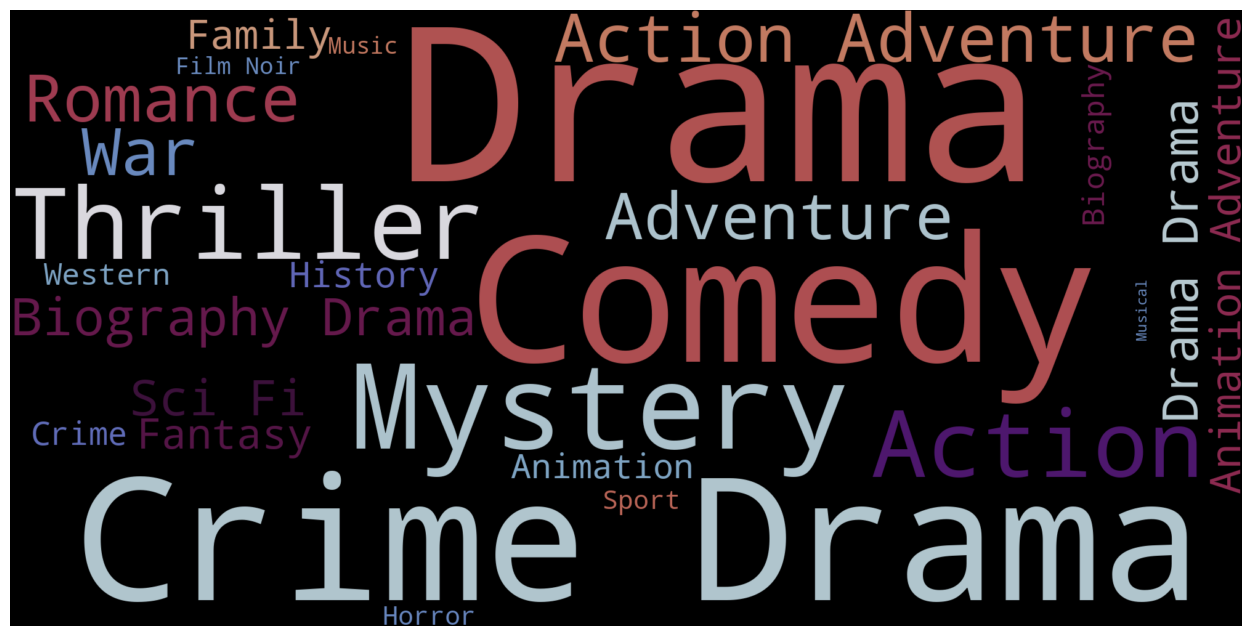

In [154]:
from wordcloud import STOPWORDS as stopwords_wc
from wordcloud import WordCloud, ImageColorGenerator

# Make worldcloud
all_tweets = " ".join(token for token in data["genre"])
stopwords_wc = set(stopwords_wc)

wordcloud = WordCloud(stopwords=stopwords_wc,
                      max_words=1500,
                      max_font_size=350, random_state=42,
                      width=2000, height=1000,
                      colormap = "twilight")
wordcloud.generate(all_tweets)

# Plot
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

# Data Preprocessing



### Mengecek Missing Values
- **data.shape** → memberi informasi ukuran DataFrame dalam bentuk `(baris, kolom)`.  
- **print(data.shape)** → menampilkan jumlah baris dan kolom dari dataset.  

didapatkan hasil 250 baris 13 colom dan tidak ada missing value juga. mantap, lanjut!

In [28]:
print(data.shape)
print("Missing values:\n", data.isnull().sum())

(250, 13)
Missing values:
 rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64


### Split genre menjadi beberapa kolom
- **data['genre'].str.split(',', expand=True)** → pecah isi kolom `genre` (dipisah dengan koma) jadi beberapa kolom baru.  
- **num_cols = len(genres_df.columns)** → hitung jumlah kolom hasil pemecahan.  
- **genres_df.columns = [f'genre_{i}' ...]** → beri nama kolom baru dengan format `genre_1`, `genre_2`, dst.  
- **pd.concat([data, genres_df], axis=1)** → gabungkan DataFrame asli dengan kolom genre baru secara horizontal (axis=1).  


In [103]:
genres_df = data['genre'].str.split(',', expand=True)

num_cols = len(genres_df.columns)
genres_df.columns = [f'genre_{i}' for i in range(1, num_cols+1)]

data = pd.concat([data, genres_df], axis=1)

- **data** → menampilkan isi keseluruhan DataFrame.  

In [109]:
data

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,genre_1,genre_2,genre_3,genre_1,genre_2,genre_3
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont",Drama,None,None,Drama,None,None
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",Crime,Drama,None,Crime,Drama,None
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",Action,Crime,Drama,Action,Crime,Drama
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo",Crime,Drama,None,Crime,Drama,None
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,Crime,Drama,None,Crime,Drama,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Help,2011,8.1,Drama,PG-13,2h 26m,Change begins with a whisper.,25000000,216639112,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett",Drama,None,None,Drama,None,None
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama",G,2h 22m,There is man and beast at nature's mercy. Ther...,4000000,14480,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev",Adventure,Biography,Drama,Adventure,Biography,Drama
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy",G,1h 30m,Wish granted! (DVD re-release),Not Available,0,"Scott Weinger,Robin Williams,Linda Larkin,Jona...","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott",Animation,Adventure,Comedy,Animation,Adventure,Comedy
248,249,Gandhi,1982,8.0,"Biography,Drama,History",PG,3h 11m,His Triumph Changed The World Forever.,22000000,52767889,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley,Biography,Drama,History,Biography,Drama,History


### Isi missing values

- **[col for col in data.columns if col.startswith('genre_')]** → buat list semua kolom yang namanya diawali `genre_`.  
- **for col in genre_cols: data[col].fillna('Unknown', inplace=True)** →  
  - Ganti semua nilai kosong (NaN) di tiap kolom genre dengan `'Unknown'`.  
  - **inplace=True** → perubahan langsung diterapkan ke DataFrame asli.  


In [110]:
genre_cols = [col for col in data.columns if col.startswith('genre_')]
for col in genre_cols:
    data[col].fillna('Unknown', inplace=True)

/tmp/ipython-input-91193999.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Konversi Year & Rating ke numerik

- **pd.to_numeric(data['Year'], errors='coerce')** → ubah kolom `Year` menjadi tipe numerik; nilai yang tidak bisa dikonversi menjadi `NaN`.  
- **pd.to_numeric(data['Rating'], errors='coerce')** → ubah kolom `Rating` menjadi tipe numerik; nilai invalid jadi `NaN`.  
- **data.dropna(subset=['Year','Rating'], inplace=True)** → hapus baris yang memiliki `NaN` di kolom `Year` atau `Rating`.  
Tujuannya untuk memastikan kolom numerik siap untuk analisis/statistik.  


In [114]:
data['year'] = pd.to_numeric(data['year'], errors='coerce')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data.dropna(subset=['year','rating'], inplace=True)

### Hapus duplikasi

- **data.drop_duplicates(inplace=True)** → hapus baris yang duplikat di DataFrame.  
  - **inplace=True** → perubahan langsung diterapkan ke DataFrame asli.  
Tujuannya untuk menjaga data tetap unik agar analisis atau model tidak bias.  


In [115]:
data.drop_duplicates(inplace=True)

- **data.copy()** → membuat salinan penuh (deep copy) dari DataFrame `data`.  
- **df = data.copy()** → menyimpan salinan DataFrame ke variabel baru `df`,  
  sehingga perubahan di `df` tidak memengaruhi `data` asli.  

In [116]:
df = data.copy()

# Data Preparation



### Menggabungkan Semua genre

- **df[genre_cols].apply(lambda x: ' '.join(x.astype(str)), axis=1)** →  
  gabungkan semua kolom genre menjadi satu string per film.  
  - **x.astype(str)** → pastikan semua nilai diubah jadi string.  
  - **' '.join(...)** → gabungkan nilai genre dengan spasi.  
  - **axis=1** → lakukan operasi per baris (bukan per kolom).  
- **df['genre_combined'] = ...** → simpan hasil gabungan ke kolom baru `genre_combined`.  
Tujuannya untuk memudahkan analisis teks (misal TF-IDF untuk rekomendasi).  


In [123]:
df['genre_combined'] = df[genre_cols].apply(lambda x: ' '.join(x.astype(str)), axis=1)

### Buat pivot Table User Movie (simulasi user rating)

- **user_ids = range(1,11)** → buat daftar 10 user dengan ID 1–10.  
- **ratings_list = []** → inisialisasi list kosong untuk menyimpan data rating.  

- **for idx, row in df.iterrows(): ...** → loop tiap baris film di DataFrame:  
  - Untuk tiap user, tambahkan dictionary:  
    - **UserId** → ID user.  
    - **name** → nama film.  
    - **rating** → rating film + sedikit noise acak (Normal(0,0.5)) untuk variasi.  
  - Simpan dictionary ke `ratings_list`.  

- **ratings_df = pd.DataFrame(ratings_list)** → ubah list menjadi DataFrame dengan kolom `UserId`, `name`, `rating`.  

- **user_movie_ratings = ratings_df.pivot_table(index='UserId', columns='name', values='rating')** → buat pivot table:  
  - Baris = user  
  - Kolom = film  
  - Nilai = rating  
Tujuannya menyiapkan dataset seperti **user-item matrix** untuk sistem rekomendasi berbasis collaborative filtering.  


In [125]:
user_ids = range(1,11)
ratings_list = []
for idx, row in df.iterrows():
    for user in user_ids:
        ratings_list.append({
            'UserId': user,
            'name': row['name'],
            'rating': row['rating'] + np.random.normal(0, 0.5)
        })
ratings_df = pd.DataFrame(ratings_list)
user_movie_ratings = ratings_df.pivot_table(index='UserId', columns='name', values='rating')


### Menggunakan fitur numerik Year + Rating

- **X = df[['year', 'rating']]** → pilih kolom `year` dan `rating` sebagai fitur (input) untuk model/rekomendasi.  
- **y = df['name']** → pilih kolom `name` sebagai target/label (output) yang ingin diprediksi atau dianalisis.  
Tujuannya untuk memisahkan data menjadi fitur & target, misal untuk machine learning atau sistem rekomendasi.  


In [127]:
X = df[['year', 'rating']]
y = df['name']

# Model Development


### Content-Based Filtering


#### Data Understanding


- **print("Contoh beberapa film dan genre:")** → cetak judul/label untuk menampilkan contoh data.  
- **df[['name','genre_combined']].head()** → ambil kolom `name` dan `genre_combined`, tampilkan 5 baris pertama.  
- **display(...)** → tampilkan tabel secara rapi di notebook (lebih enak dibaca dibanding `print`).  
Tujuannya untuk melihat contoh film beserta genre gabungannya sebelum analisis/rekomendasi.  

In [134]:
print("Contoh beberapa film dan genre:")
display(df[['name','genre_combined']].head())

Contoh beberapa film dan genre:


,name,genre_combined
0,The Shawshank Redemption,Drama Drama None None None None Drama Drama No...
1,The Godfather,Crime Crime Drama Drama None None Crime Crime ...
2,The Dark Knight,Action Action Crime Crime Drama Drama Action A...
3,The Godfather Part II,Crime Crime Drama Drama None None Crime Crime ...
4,12 Angry Men,Crime Crime Drama Drama None None Crime Crime ...


####  Data Preparation



- **TfidfVectorizer(stop_words='english')** → ubah teks menjadi representasi numerik TF-IDF, mengabaikan kata umum (stop words) dalam bahasa Inggris.  
- **tfidf.fit_transform(df['genre_combined'])** → hitung TF-IDF matrix untuk kolom `genre_combined` di setiap film.  
Tujuannya untuk menyiapkan data teks agar bisa digunakan untuk menghitung kemiripan antar film (content-based recommendation).  
- **cosine_similarity(tfidf_matrix, tfidf_matrix)** → hitung **kemiripan kosinus** antar film berdasarkan TF-IDF genre.  
  - Setiap film dibandingkan dengan semua film lain.  
  - Nilai mendekati 1 → sangat mirip, mendekati 0 → kurang mirip.  

In [137]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genre_combined'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

####  Fungsi Rekomendasi




- **get_content_recommendations(name, cosine_sim=cosine_sim)** → fungsi rekomendasi film:  
  - Cek apakah film ada di dataset.  
  - Ambil indeks film yang dicari.  
  - Hitung skor kemiripan dengan semua film lain.  
  - Urutkan dari paling mirip ke kurang mirip, ambil 10 film teratas (kecuali film yang dicari).  
  - Kembalikan daftar nama film yang direkomendasikan.  


In [140]:
def get_content_recommendations(name, cosine_sim=cosine_sim):
    if name not in df['name'].values:
        return f"Film '{name}' tidak ditemukan!"
    idx = df.index[df['name'] == name][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['name'].iloc[movie_indices].tolist()

####  Mendapatkan Rekomendasi
- **print("Content-Based Recommendations:")** → cetak judul/label untuk hasil rekomendasi.  
- **get_content_recommendations('The Shawshank Redemption')** → panggil fungsi rekomendasi berbasis konten untuk film `'The Shawshank Redemption'`.  
- **print(...)** → tampilkan daftar 10 film teratas yang mirip berdasarkan genre dengan film tersebut.  


In [141]:
print("Content-Based Recommendations:")
print(get_content_recommendations('The Shawshank Redemption'))

Content-Based Recommendations:
['Fight Club', "One Flew Over the Cuckoo's Nest", 'American Beauty', 'Requiem for a Dream', 'Capernaum', 'The Hunt', 'Ikiru', 'A Separation', 'Bicycle Thieves', 'All About Eve']


### Collaborative Filtering

#### Data Understanding

- **print("Pivot table user x movie:")** → cetak label untuk menampilkan pivot table.  
- **user_movie_ratings.head()** → ambil 5 baris pertama dari pivot table **user vs movie**.  
- **display(...)** → tampilkan tabel secara rapi di notebook (lebih mudah dibaca dibanding `print`).  
Tujuannya untuk melihat contoh matriks rating user-film sebelum diterapkan collaborative filtering.  


In [142]:
print("Pivot table user x movie:")
display(user_movie_ratings.head())

Pivot table user x movie:


name,12 Angry Men,12 Years a Slave,1917,2001: A Space Odyssey,3 Idiots,A Beautiful Mind,A Clockwork Orange,A Separation,Aladdin,Alien,...,V for Vendetta,Vertigo,WALL·E,Warrior,Whiplash,Wild Strawberries,Wild Tales,Witness for the Prosecution,Yojimbo,Your Name.
UserId,,,,,,,,,,,,,,,,,,,,,
1,8.650063,7.900590,8.456907,8.659989,8.962126,8.168543,8.175652,8.217028,8.300004,8.630081,...,7.991098,7.756918,8.671332,8.100720,8.425337,8.870447,7.576259,8.664416,8.174999,8.151673
2,8.568814,8.828957,9.040700,8.308732,8.070652,8.027163,9.420569,8.274840,7.991365,8.697771,...,9.221900,8.431749,8.030393,8.327797,8.244732,7.106990,7.538805,8.294443,8.305931,8.553867
3,9.441081,9.661693,9.556186,9.019365,7.924659,9.042117,8.401054,7.732248,8.114056,9.019941,...,7.305744,7.509576,7.997127,8.472274,8.882766,8.489389,8.339370,8.267449,8.819035,8.624613
4,8.758992,8.423843,8.566950,8.712785,8.698915,7.732948,7.924225,8.347615,7.309409,8.833480,...,8.745638,8.422204,8.495365,9.192853,8.069102,8.323181,8.553211,8.140120,8.090219,8.142347
5,8.612259,8.482938,7.711567,7.735493,7.878625,8.581101,8.241791,9.218738,8.267693,8.047816,...,7.893326,8.735762,8.584227,8.733484,7.718277,8.469570,7.834072,7.836398,8.724667,8.578693


####  Data Preparation

- **user_movie_ratings.fillna(0).T** → transpose pivot table user×movie dan ganti NaN dengan 0 supaya bisa dihitung kemiripan antar film.  
- **cosine_similarity(...)** → hitung **kemiripan kosinus** antar film berdasarkan rating user (item-based similarity).  


In [143]:
item_similarity = cosine_similarity(user_movie_ratings.fillna(0).T)

#### Fungsi Rekomendasi

- **user_movie_ratings.fillna(0).T** → transpose user-item matrix dan ganti NaN dengan 0 supaya siap dihitung kemiripannya antar film.  
- **cosine_similarity(...)** → hitung kemiripan antar film berdasarkan rating user (item-based similarity).  
- **get_item_based_recommendations(movie_title, ...)** → fungsi rekomendasi berbasis **item**:  
  - Cek apakah film ada di dataset.  
  - Ambil indeks film yang dicari.  
  - Ambil skor kemiripan film lain dengan film tersebut.  
  - Urutkan dari paling mirip ke kurang mirip, ambil `top_n` film teratas.  
  - Kembalikan daftar nama film yang direkomendasikan.  
Tujuannya adalah memberikan rekomendasi film mirip berdasarkan perilaku rating user lain (collaborative filtering).  


In [130]:
def get_item_based_recommendations(movie_title, user_movie_ratings=user_movie_ratings, item_similarity=item_similarity, top_n=10):
    if movie_title not in user_movie_ratings.columns:
        return f"Film '{movie_title}' tidak ditemukan!"
    movie_idx = user_movie_ratings.columns.get_loc(movie_title)
    similar_scores = item_similarity[movie_idx]
    similar_movie_indices = similar_scores.argsort()[-top_n-1:-1][::-1]
    similar_movie_titles = user_movie_ratings.columns[similar_movie_indices]
    return similar_movie_titles.tolist()


#### Mendapatkan Rekomendasi
- **print("\nCollaborative Filtering Recommendations (Fixed):")** → cetak judul/label untuk hasil rekomendasi berbasis collaborative filtering.  
- **get_item_based_recommendations('The Dark Knight')** → panggil fungsi rekomendasi berbasis item untuk film `'The Dark Knight'`.  
- **print(...)** → tampilkan daftar 10 film teratas yang mirip berdasarkan rating user lain.  
Tujuannya adalah  melihat hasil **item-based collaborative filtering**.  


In [131]:
print("\nCollaborative Filtering Recommendations (Fixed):")
print(get_item_based_recommendations('The Dark Knight'))


Collaborative Filtering Recommendations (Fixed):
['Taxi Driver', 'Yojimbo', 'Full Metal Jacket', 'Se7en', 'Eternal Sunshine of the Spotless Mind', 'Judgment at Nuremberg', 'The Kid', 'Witness for the Prosecution', 'Once Upon a Time in America', 'Memento']


# Proses Training

### Nearest Neighbors

#### Data Understanding

- **X.columns.tolist()** → ambil daftar nama kolom fitur (input) yang digunakan.  
- **print("Fitur yang digunakan:", ...)** → tampilkan daftar fitur yang dipakai untuk analisis atau model.  
Tujuannya untuk memastikan kolom fitur sudah benar sebelum diterapkan ke model atau sistem rekomendasi.  


In [145]:
print("Fitur yang digunakan:", X.columns.tolist())

Fitur yang digunakan: ['year', 'rating']


#### Data Preparation

- **train_test_split(X, y, test_size=0.2, random_state=42)** → bagi dataset menjadi **training set** dan **testing set**:  
  - **X_train, y_train** → data dan target


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Model Initialization

- **NearestNeighbors(n_neighbors=10, algorithm='ball_tree')** → buat model **Nearest Neighbors** untuk mencari item terdekat:  
  - **n_neighbors=10** → jumlah tetangga terdekat yang dicari per item.  
  - **algorithm='ball_tree'** → metode optimasi untuk mencari tetangga terdekat dengan cepat.  
Tujuannya menyiapkan model **collaborative filtering** berbasis tetangga untuk rekomendasi film.  


In [147]:
nn_model = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

#### Memulai Training

- **nn_model.fit(X_train)** → latih model **Nearest Neighbors** menggunakan data training (`X_train`).  
Tujuannya untuk model siap mencari tetangga terdekat (film/film-feature) untuk sistem rekomendasi.  


In [148]:
nn_model.fit(X_train)

NearestNeighbors(algorithm='ball_tree', n_neighbors=10)

#### Mendapatkan Rekomendasi

In [150]:
print("\nNearest Neighbors Recommendations:")
for i in range(5):
    print(f"Rekomendasi untuk '{y_test.iloc[i]}':")
    for idx in indices[i]:
        print(f"- {y_train.iloc[idx]}")
    print()


Nearest Neighbors Recommendations:
Rekomendasi untuk 'A Beautiful Mind':
- Monsters, Inc.
- Amélie
- The Lord of the Rings: The Fellowship of the Ring
- Amores Perros
- Catch Me If You Can
- Requiem for a Dream
- Memento
- The Pianist
- Gladiator
- City of God

Rekomendasi untuk 'The Lord of the Rings: The Return of the King':
- Kill Bill: Vol. 1
- Finding Nemo
- Memories of Murder
- Pirates of the Caribbean: The Curse of the Black Pearl
- The Lord of the Rings: The Two Towers
- City of God
- The Pianist
- Eternal Sunshine of the Spotless Mind
- Howl's Moving Castle
- Downfall

Rekomendasi untuk 'North by Northwest':
- Some Like It Hot
- The 400 Blows
- Ben-Hur
- The Apartment
- Vertigo
- Psycho
- Judgment at Nuremberg
- Paths of Glory
- Witness for the Prosecution
- The Bridge on the River Kwai

Rekomendasi untuk 'The Shining':
- The Elephant Man
- Raging Bull
- Star Wars: Episode V - The Empire Strikes Back
- The Boat
- Alien
- Apocalypse Now
- Life of Brian
- The Thing
- Blade Runn

# Evaluasi

###  Evaluasi Content-Based Filtering



- **plt.figure(figsize=(10,8))** → atur ukuran figure (lebar 10, tinggi 8).  
- **sns.heatmap(...)** → buat **heatmap** untuk menampilkan matriks kemiripan kosinus:  
  - **cosine_sim[:10,:10]** → ambil 10 film pertama untuk sumbu X dan Y.  
  - **annot=True** → tampilkan nilai di setiap kotak heatmap.  
  - **xticklabels=df['name'][:10], yticklabels=df['name'][:10]** → label sumbu X dan Y menggunakan nama film.  
  - **cmap='Blues'** → gunakan skema warna biru.  
- **plt.title('Cosine Similarity 10 Film Pertama')** → beri judul heatmap.  
- **plt.show()** → tampilkan heatmap di notebook.  
Tujuannya untuk visualisasi kemiripan antar film secara cepat untuk 10 film pertama.  

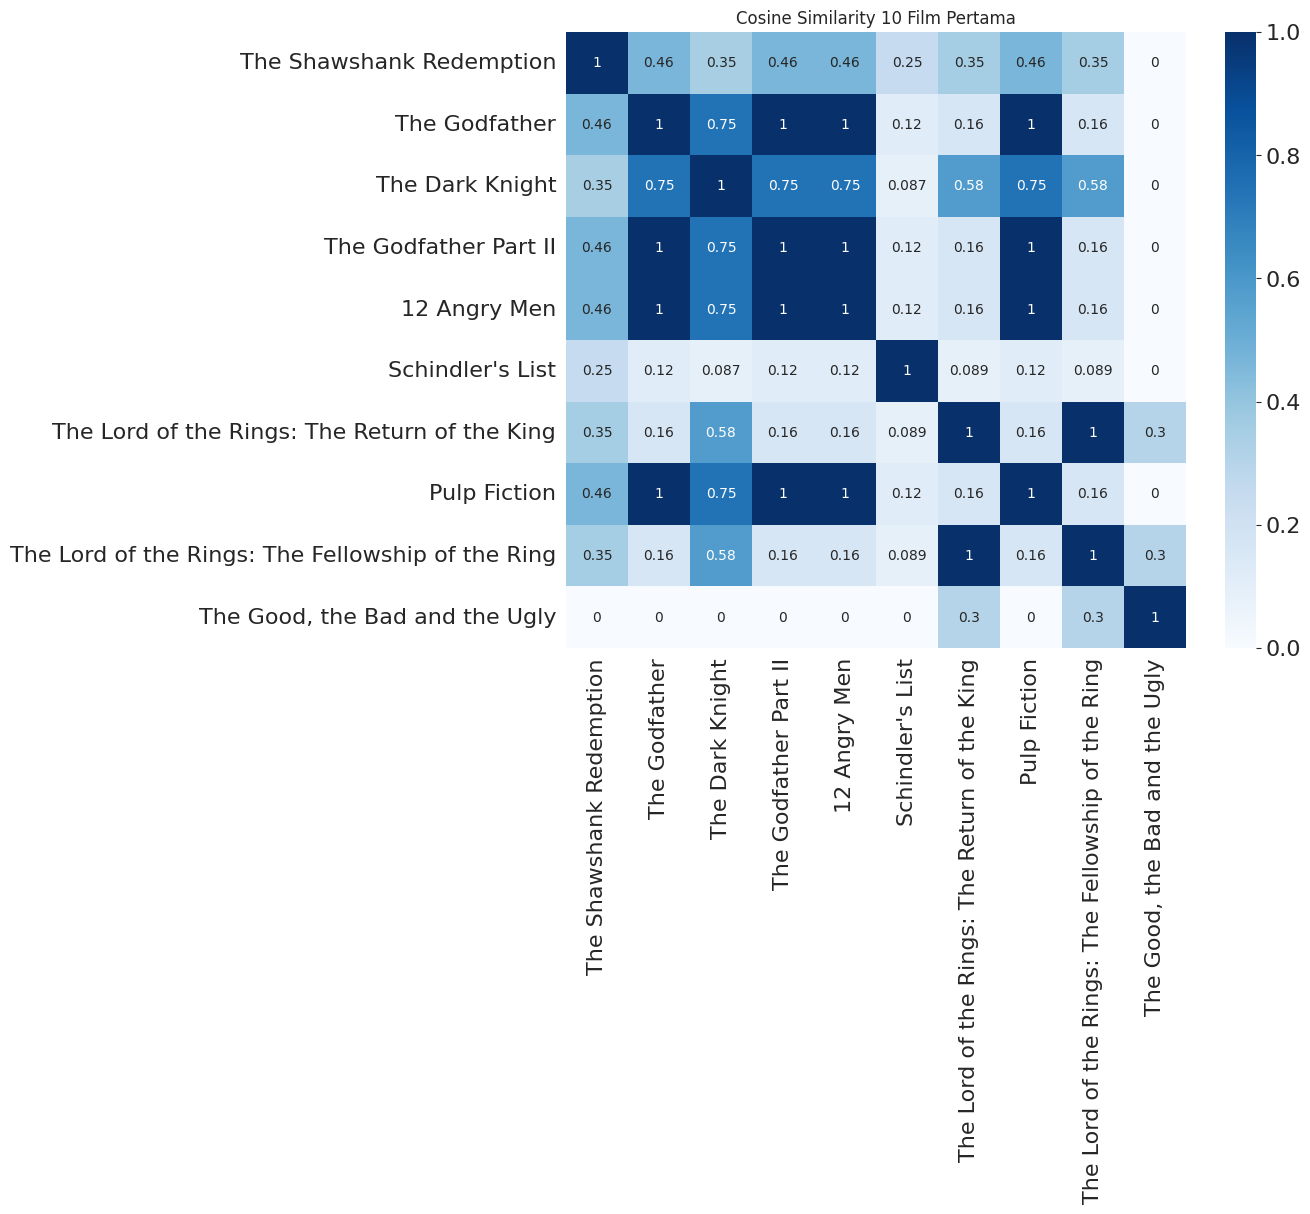

In [139]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cosine_sim[:10,:10], annot=True, xticklabels=df['name'][:10], yticklabels=df['name'][:10], cmap='Blues')
plt.title('Cosine Similarity 10 Film Pertama')
plt.show()

### Evaluasi Collaborative Filtering

- **plt.figure(figsize=(10,8))** → atur ukuran figure (lebar 10, tinggi 8).  
- **sns.heatmap(...)** → buat **heatmap** untuk menampilkan matriks kemiripan antar film (item-based):  
  - **item_similarity[:10,:10]** → ambil 10 film pertama untuk sumbu X dan Y.  
  - **annot=True** → tampilkan nilai kemiripan di tiap kotak heatmap.  
  - **xticklabels=user_movie_ratings.columns[:10], yticklabels=user_movie_ratings.columns[:10]** → label sumbu X dan Y pakai nama film.  
  - **cmap='Reds'** → gunakan skema warna merah.  
- **plt.title('Item-Item Similarity 10 Film Pertama')** → beri judul heatmap.  
- **plt.show()** → tampilkan heatmap di notebook.  
Tujuannya untuk visualisasi kemiripan antar film berdasarkan rating user.  

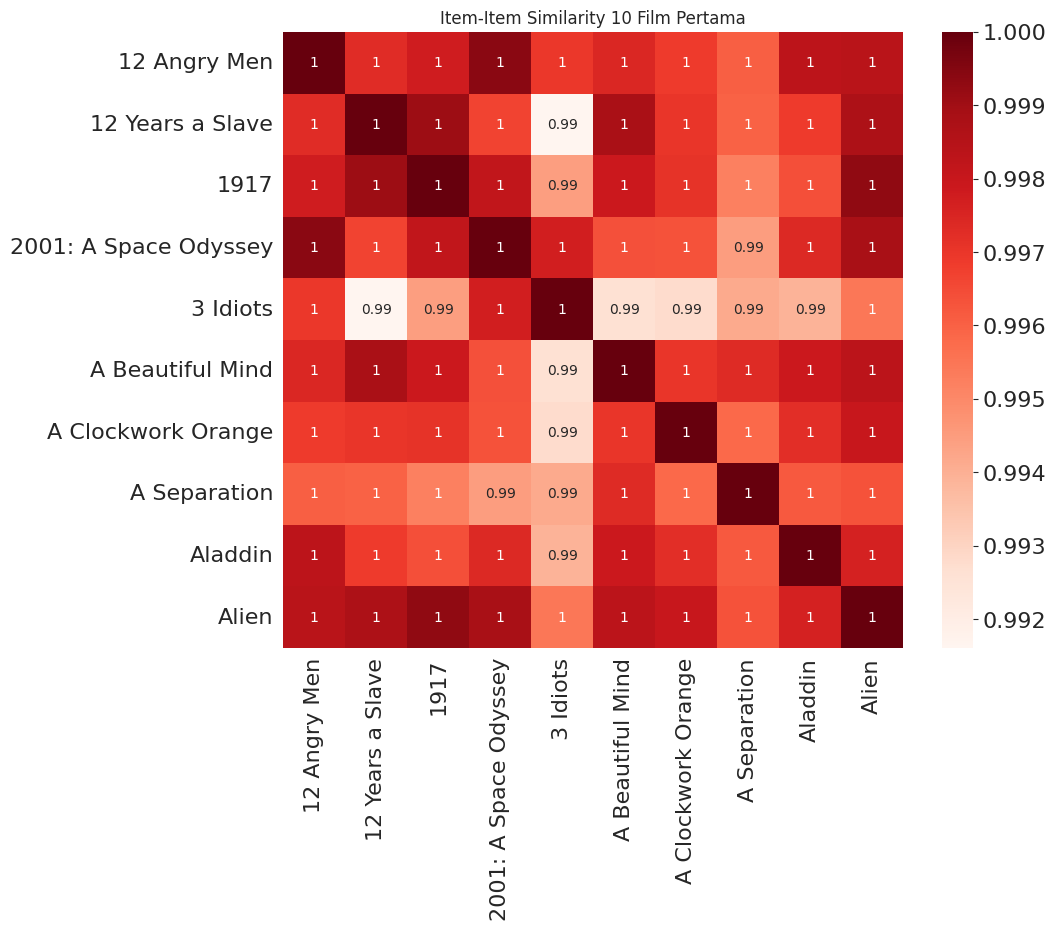

In [144]:
plt.figure(figsize=(10,8))
sns.heatmap(item_similarity[:10,:10], annot=True, xticklabels=user_movie_ratings.columns[:10], yticklabels=user_movie_ratings.columns[:10], cmap='Reds')
plt.title('Item-Item Similarity 10 Film Pertama')
plt.show()

### Evaluasi Nearest Neighbors

- **distances, indices = nn_model.kneighbors(X_test)** → cari tetangga terdekat untuk setiap data di `X_test`:  
  - **distances** → jarak ke tetangga terdekat.  
  - **indices** → indeks tetangga terdekat di data training.  

- **avg_distances = distances.mean(axis=1)** → hitung rata-rata jarak ke semua tetangga per data.  

- **plt.figure(figsize=(8,5))** → atur ukuran figure.  
- **sns.histplot(avg_distances, bins=20, color='purple')** → buat histogram distribusi rata-rata jarak tetangga.  
- **plt.title(...) / plt.xlabel(...) / plt.ylabel(...)** → beri judul dan label sumbu.  
- **plt.show()** → tampilkan histogram di notebook.  

Tujuannya untuk visualisasi sebaran jarak tetangga untuk menilai seberapa dekat item-film dengan tetangga terdekatnya.  


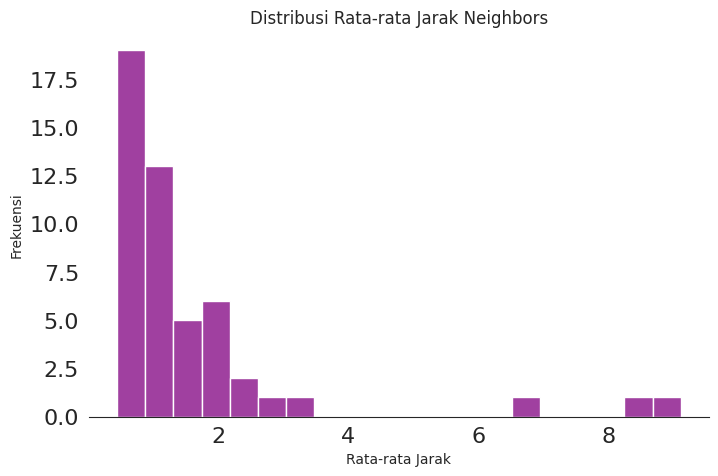

In [149]:
distances, indices = nn_model.kneighbors(X_test)
avg_distances = distances.mean(axis=1)
plt.figure(figsize=(8,5))
sns.histplot(avg_distances, bins=20, color='purple')
plt.title('Distribusi Rata-rata Jarak Neighbors')
plt.xlabel('Rata-rata Jarak')
plt.ylabel('Frekuensi')
plt.show()

- **print("\nNearest Neighbors Recommendations:")** → cetak judul/label untuk hasil rekomendasi berbasis Nearest Neighbors.  
- **for i in range(5): ...** → loop untuk 5 film pertama di data testing:  
  - **y_test.iloc[i]** → film yang ingin dicari rekomendasinya.  
  - **indices[i]** → indeks tetangga terdekat untuk film tersebut dari data training.  
  - **y_train.iloc[idx]** → nama film tetangga yang direkomendasikan.  
- **print()** → beri baris kosong antar rekomendasi supaya lebih rapi.  

Tujuannya untuk menampilkan daftar film yang mirip berdasarkan **collaborative filtering Nearest Neighbors** untuk beberapa contoh film testing.  
